In [4]:
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\m1568006\\Desktop\\Test_venv\\.venv\\HR_comma_sep.csv')

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: >

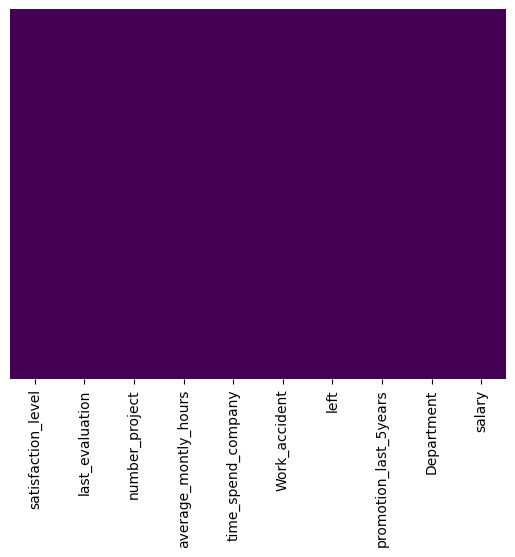

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

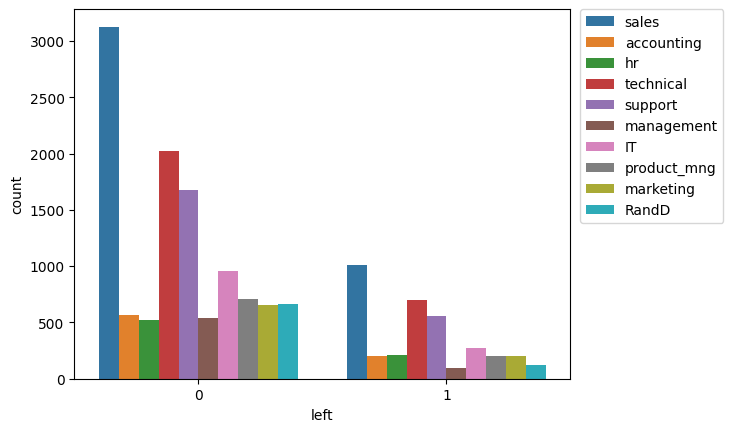

In [8]:
# sns.countplot(x='left', hue='satisfaction_level', data=df, dodge=True)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.countplot(x='left', hue='Department', data=df, dodge=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [9]:
depart = pd.get_dummies(df['Department'], drop_first=True)
df.drop(['Department'], axis=1)
df = pd.concat([df, depart], axis=1)

In [10]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,sales,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,sales,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,support,low,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,support,low,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,support,low,False,False,False,False,False,False,False,True,False


In [11]:
df.drop(['Department'], axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,low,False,False,False,False,False,False,False,True,False


In [12]:
salary = pd.get_dummies(df['salary'])
df = pd.concat([df, salary], axis=1)
df.drop(['salary'], axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,False,False,False,False,False,True,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,False,False,False,False,False,True,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,False,False,False,False,False,True,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,False,False,False,False,False,True,False,False,True,False


In [13]:
df.drop(['salary'], axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,False,...,False,False,False,False,False,True,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,support,False,...,False,False,False,False,False,True,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,support,False,...,False,False,False,False,False,True,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,support,False,...,False,False,False,False,False,True,False,False,True,False


In [14]:
df.drop(['Department', 'salary'], inplace=True, axis=1)

In [15]:
x = df.drop(['left'], axis=1)
y = df['left']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
logmodel = LogisticRegression(max_iter=999)

In [18]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=999)

In [19]:
prediction = logmodel.predict(x_test)

In [20]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500



In [21]:
print(confusion_matrix(y_test, prediction))

[[3175  253]
 [ 710  362]]
